## Example 1: Image Retrieval

In this notebook the aim is to use the notion of histogram and bin-by-bin and cross-bin distances to retrieve similar image in a dataset.

In [1]:
from Rubner import *
import pandas as pd
from skimage import io

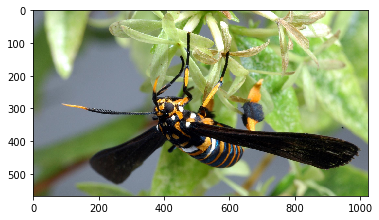

In [2]:
fp = "/home/umberto/Pictures/night/21.jpg";
reference = io.imread(fp);
plt.imshow(reference)

In [3]:
LABreference = color.rgb2lab(reference);
H = LABHistogram(LABreference,4,8);
AV = len(AverageHistogram(H,reference[:,:,0].size/1000))
dm = MinkowskiHDistance(H,H,1);
dj = JefferyDivergence(H,H,reference[:,:,0].size/1000,reference[:,:,0].size/1000);
dk = Kolmogorov(H,H);

In [4]:
d = {'File':[fp],'AvHistogram':[AV],'MinkDistance':[dm],'JefferyDiv':[dj],'KS':[dk]}
Table = pd.DataFrame(data=d)
Table

File  AvHistogram  MinkDistance  JefferyDiv  \
0  /home/umberto/Pictures/night/21.jpg           11           0.0         0.0   

    KS  
0  0.0

In [ ]:
for i in range(1,1361):
    fp = "/home/umberto/Pictures/night/";
    fp = fp+str(i)+ ".jpg";
    test = io.imread(fp);
    LABtest = color.rgb2lab(test);
    K = LABHistogram(LABtest,4,8);
    AV = len(AverageHistogram(K,test[:,:,0].size/1000))
    dm = MinkowskiHDistance(H,K,1);
    dj = JefferyDivergence(H,K,reference[:,:,0].size/1000,test[:,:,0].size/1000);
    dk = Kolmogorov(H,K);
    Table.loc[i] = [fp,AV,dm,dj,dk]
    if i%10  == 9:
        print(i);
    del test, K;

In [6]:
Table.to_pickle("./Table.pkl")

Now we will plot the image that are more similar to the reference image using as distance measure the Jefery divergence.

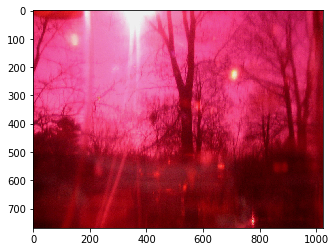

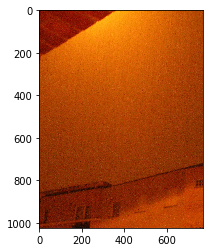

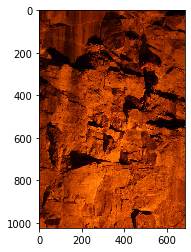

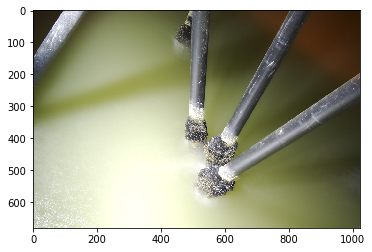

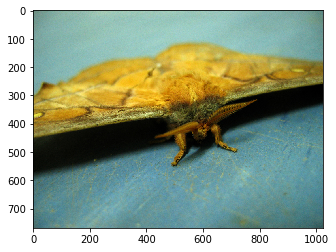

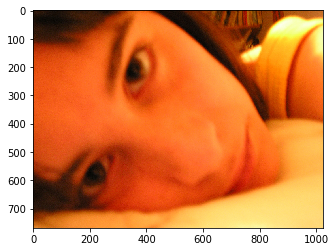

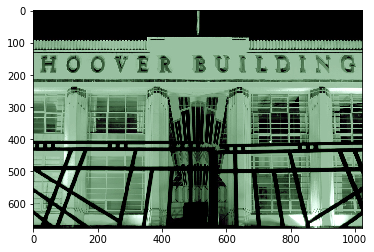

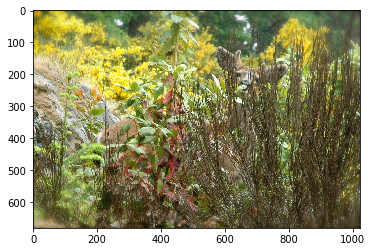

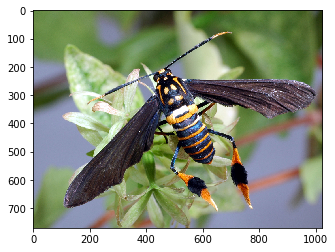

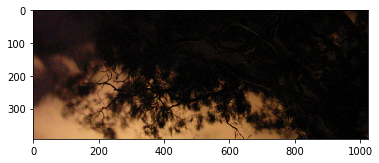

In [15]:
Table.sort_values(by=['JefferyDiv'], inplace=True, ascending=True)
for i in range(2,12):
    reference = io.imread(Table['File'].iloc[i]);
    plt.imshow(reference)
    plt.show()
    

In [16]:
Table.head(12)

File  AvHistogram  MinkDistance  \
0       /home/umberto/Pictures/night/21.jpg           11           0.0   
21      /home/umberto/Pictures/night/21.jpg           11           0.0   
258    /home/umberto/Pictures/night/258.jpg            8     1261992.0   
1293  /home/umberto/Pictures/night/1293.jpg            7     1292562.0   
1202  /home/umberto/Pictures/night/1202.jpg            5     1153178.0   
242    /home/umberto/Pictures/night/242.jpg            8      305872.0   
160    /home/umberto/Pictures/night/160.jpg            8      361980.0   
320    /home/umberto/Pictures/night/320.jpg           10     1083436.0   
223    /home/umberto/Pictures/night/223.jpg            6      399450.0   
329    /home/umberto/Pictures/night/329.jpg            9      369926.0   
22      /home/umberto/Pictures/night/22.jpg           12      330088.0   
1084  /home/umberto/Pictures/night/1084.jpg            4      729196.0   

        JefferyDiv          KS  
0         0.000000         0.0  
21        0.000000         0.0  
258    2901.243466  44441192.0  
1293  23188.346590  51551987.0  
1202  42174.090289  49275259.0  
242   43612.821462  17165629.0  
160   58838.272928  25615654.0  
320   62308.026330  25513501.0  
223   66640.333677  35756915.0  
329   76903.745749  28341195.0  
22    80395.525545  30694254.0  
1084  86925.114113  35415847.0

Now we will plot the image that are more similar to the reference image using as distance measure the Minkowski distance.

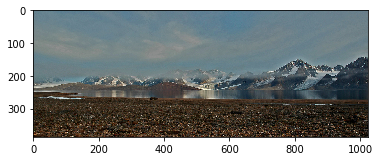

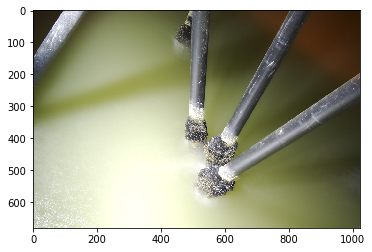

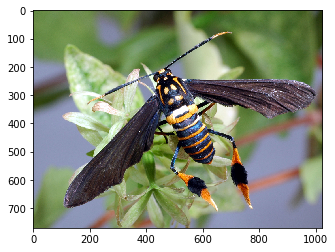

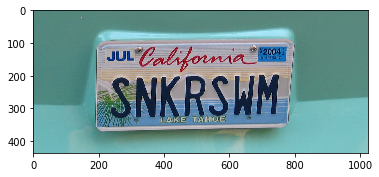

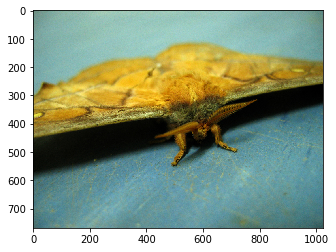

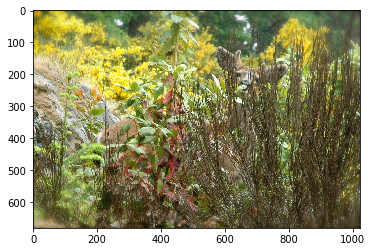

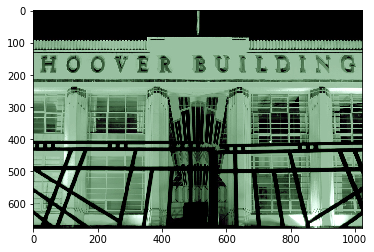

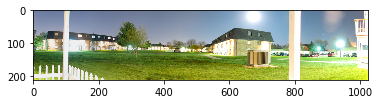

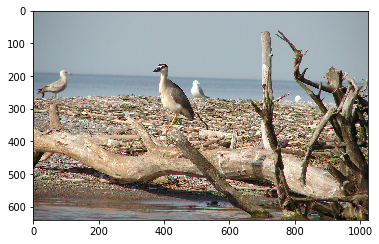

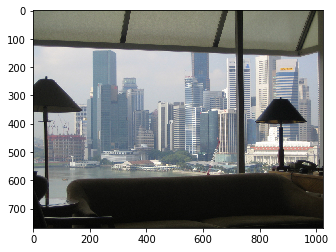

In [11]:
Table.sort_values(by=['MinkDistance'], inplace=True, ascending=True)
for i in range(2,12):
    reference = io.imread(Table['File'].iloc[i]);
    plt.imshow(reference)
    plt.show()

In [14]:
Table.head(12)

File  AvHistogram  MinkDistance  \
0       /home/umberto/Pictures/night/21.jpg           11           0.0   
21      /home/umberto/Pictures/night/21.jpg           11           0.0   
555    /home/umberto/Pictures/night/555.jpg            8      300676.0   
242    /home/umberto/Pictures/night/242.jpg            8      305872.0   
22      /home/umberto/Pictures/night/22.jpg           12      330088.0   
959    /home/umberto/Pictures/night/959.jpg           10      334544.0   
160    /home/umberto/Pictures/night/160.jpg            8      361980.0   
329    /home/umberto/Pictures/night/329.jpg            9      369926.0   
223    /home/umberto/Pictures/night/223.jpg            6      399450.0   
510    /home/umberto/Pictures/night/510.jpg           11      411646.0   
1176  /home/umberto/Pictures/night/1176.jpg           10      423452.0   
249    /home/umberto/Pictures/night/249.jpg            8      433576.0   

         JefferyDiv          KS  
0          0.000000         0.0  
21         0.000000         0.0  
555   113219.503005  12874453.0  
242    43612.821462  17165629.0  
22     80395.525545  30694254.0  
959    88520.629610  16114599.0  
160    58838.272928  25615654.0  
329    76903.745749  28341195.0  
223    66640.333677  35756915.0  
510   137181.362524  43369682.0  
1176  113971.362345  12094439.0  
249   115748.805124  38650002.0

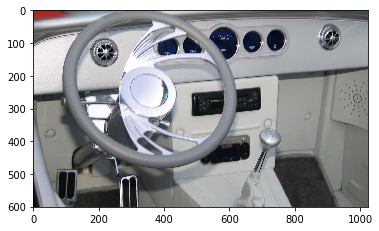

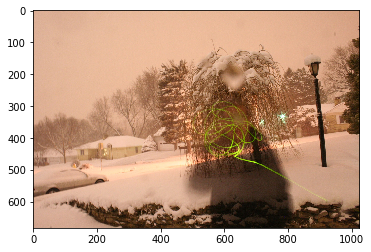

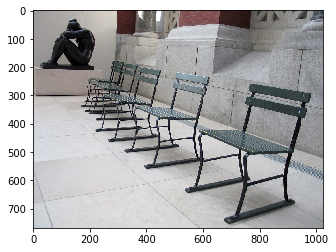

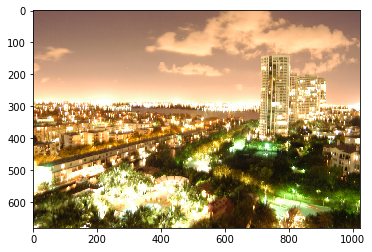

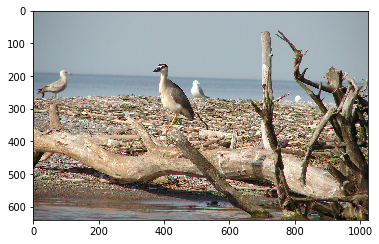

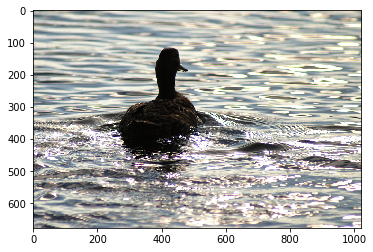

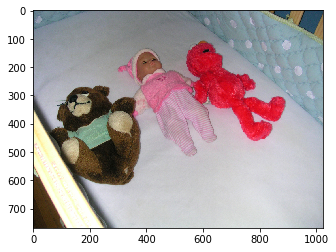

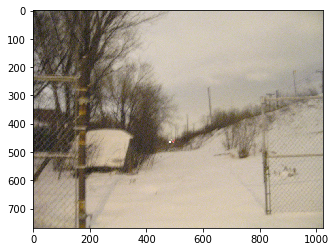

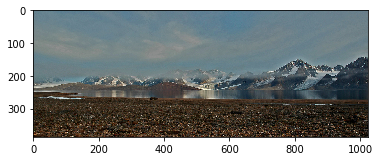

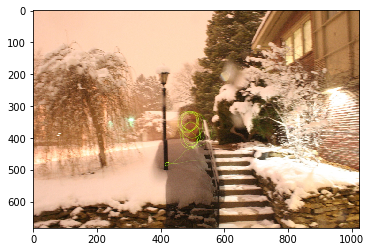

In [9]:
Table.sort_values(by=['KS'], inplace=True, ascending=True)
for i in range(2,12):
    reference = io.imread(Table['File'].iloc[i]);
    plt.imshow(reference)
    plt.show()

In [10]:
Table

File  AvHistogram  MinkDistance  \
0       /home/umberto/Pictures/night/21.jpg           11           0.0   
21      /home/umberto/Pictures/night/21.jpg           11           0.0   
1028  /home/umberto/Pictures/night/1028.jpg            9      476548.0   
750    /home/umberto/Pictures/night/750.jpg            8     1016066.0   
315    /home/umberto/Pictures/night/315.jpg            8      723790.0   
...                                     ...          ...           ...   
269    /home/umberto/Pictures/night/269.jpg            4     1378564.0   
185    /home/umberto/Pictures/night/185.jpg           11     1339190.0   
298    /home/umberto/Pictures/night/298.jpg            5     1310992.0   
178    /home/umberto/Pictures/night/178.jpg            9     1354144.0   
482    /home/umberto/Pictures/night/482.jpg           10     1447132.0   

         JefferyDiv           KS  
0          0.000000          0.0  
21         0.000000          0.0  
1028  141049.511394    6897002.0  
750   544259.483527    9696407.0  
315   273866.916139   10879705.0  
...             ...          ...  
269   450118.695914  144883856.0  
185   409501.530440  152472403.0  
298   627697.407307  152835039.0  
178   528917.894468  153761461.0  
482   625332.818188  156332805.0  

[1361 rows x 5 columns]